In [1]:
'''
DW Hackathon
March 15, 2019
Bill Andreopoulos, Chris Beecroft
Slides are under:   https://docs.google.com/presentation/d/1ihLvV-IKd3cSseRB4MCUwUlIY1HTheBeehm6BpkB6f0/edit#slide=id.p
'''

import pandas as pd
import os

'''
Normalize a dataset (pandas dataframe)
'''
def norm_data(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm

#Dict for Pandas DataFrames
di = {}


### Read the csv files with pandas
### Join the CLARITY_PROCESS_UDFS with PHYSICAL_RUN_USS
### Consider normalizing the columns (but need to select the numerical ones)

In [15]:
###all_csv_files = glob.glob("/global/projectb/scratch/beecroft/datahack-dw/*csv")
p = "/global/projectb/scratch/beecroft/datahack-dw/"
three_csv_files = [os.path.join(p, 'CLARITY_PROCESS_UDFS.csv'), 
                   os.path.join(p, 'PHYSICAL_RUN_USS.csv'), 
                   os.path.join(p, 'ALL_INCLUSIVE_REPORT.csv') ]

di = {}
###read the files . Normalize them!
for fi in three_csv_files:
   di[fi] = pd.read_csv(fi)


###join the files
result = pd.merge(di.get(os.path.join(p, 'CLARITY_PROCESS_UDFS.csv')), di.get(os.path.join(p, 'PHYSICAL_RUN_USS.csv')), on='PROCESSID')

###compute correlations
#spearmans is better for ordinal
corr = result.corr(method ='spearman')

c1 = corr.abs().unstack()
c1.sort_values(ascending = False)


/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (8,14,15,16,18,21,22,24,25,26,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,49,52,53,55,56,58,59,61,62,63,64,66,67,71,72,74,75,76,78,80,81,82,83,84,85,93,94,95,96,97,98,99,100,102,103,104,106,107,109,110,111,115,116,117,118,119,120,125,126,127,133,134,135,136,141,143,144,145,146,147,148,150,152,153,154,156,157,159,160,161,162,163,164,168,169,170,171,172,173,174,175,177,178,179,182) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,6,7,9,12,13,14,16,17,25,26,27,29,31,32,33,35,38,39,41,42,43,46,47,49,50,51,52,53,54,56,57,58,59,60,61,62,64,65,66,68,71,72,73,74,75,83,84,85,86,88,93,96,99,100,101,102,103,104,106,107,108,10

LAST_UPDATED_BY   LAST_UPDATED_BY                 1.000000
CREATED_BY        CREATED_BY                      1.000000
TYPEID            TYPEID                          1.000000
Buffer Cartridge  Buffer Cartridge                1.000000
PHYSICAL_RUN_ID   PHYSICAL_RUN_ID                 1.000000
PROCESSID         PROCESSID                       1.000000
PHYSICAL_RUN_ID   PROCESSID                       0.971282
PROCESSID         PHYSICAL_RUN_ID                 0.971282
                  Buffer Cartridge                0.940444
Buffer Cartridge  PROCESSID                       0.940444
PHYSICAL_RUN_ID   Buffer Cartridge                0.932096
Buffer Cartridge  PHYSICAL_RUN_ID                 0.932096
LAST_UPDATED_BY   CREATED_BY                      0.574082
CREATED_BY        LAST_UPDATED_BY                 0.574082
PHYSICAL_RUN_ID   LAST_UPDATED_BY                 0.533964
LAST_UPDATED_BY   PHYSICAL_RUN_ID                 0.533964
TYPEID            CREATED_BY                      0.4629

In [16]:
#stack/unstack:
#https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/
c1 = corr.abs().stack()
s = c1.sort_values(ascending = False)
s = s[s != 1]
s[:20]

PHYSICAL_RUN_ID   PROCESSID           0.971282
PROCESSID         PHYSICAL_RUN_ID     0.971282
                  Buffer Cartridge    0.940444
Buffer Cartridge  PROCESSID           0.940444
PHYSICAL_RUN_ID   Buffer Cartridge    0.932096
Buffer Cartridge  PHYSICAL_RUN_ID     0.932096
LAST_UPDATED_BY   CREATED_BY          0.574082
CREATED_BY        LAST_UPDATED_BY     0.574082
PHYSICAL_RUN_ID   LAST_UPDATED_BY     0.533964
LAST_UPDATED_BY   PHYSICAL_RUN_ID     0.533964
TYPEID            CREATED_BY          0.462959
CREATED_BY        TYPEID              0.462959
LAST_UPDATED_BY   TYPEID              0.421537
TYPEID            LAST_UPDATED_BY     0.421537
PROCESSID         LAST_UPDATED_BY     0.398804
LAST_UPDATED_BY   PROCESSID           0.398804
                  Buffer Cartridge    0.142619
Buffer Cartridge  LAST_UPDATED_BY     0.142619
PHYSICAL_RUN_ID   TYPEID              0.117192
TYPEID            PHYSICAL_RUN_ID     0.117192
dtype: float64

### Join the ALL_INCLUSIVE_REPORT with PHYSICAL_RUN_USS

In [17]:

###join the files
result2 = pd.merge(di.get(os.path.join(p, 'ALL_INCLUSIVE_REPORT.csv')), di.get(os.path.join(p, 'PHYSICAL_RUN_USS.csv')), left_on='PR_ID', right_on='PHYSICAL_RUN_ID')

###compute correlations
#spearmans is better for ordinal
corr = result2.corr(method ='spearman')

c1 = corr.abs().stack()
s = c1.sort_values(ascending = False)
s = s[s != 1]
s[:20]


SDM_PACBIO_RUN_ID         SDM_SMRT_CELL_ID            1.000000
SDM_SMRT_CELL_ID          SDM_PACBIO_RUN_ID           1.000000
SDM_ILLUMINA_RUN_ID       SDM_ILLUMINA_RUN_UNIT_ID    0.999979
SDM_ILLUMINA_RUN_UNIT_ID  SDM_ILLUMINA_RUN_ID         0.999979
PHYSICAL_RUN_ID           SDM_PACBIO_RUN_ID           0.999972
SDM_PACBIO_RUN_ID         PHYSICAL_RUN_ID             0.999972
PR_ID                     SDM_PACBIO_RUN_ID           0.999972
SDM_PACBIO_RUN_ID         PR_ID                       0.999972
SDM_SMRT_CELL_ID          PRU_ID                      0.999972
PRU_ID                    SDM_SMRT_CELL_ID            0.999972
SDM_PACBIO_RUN_ID         PRU_ID                      0.999972
PRU_ID                    SDM_PACBIO_RUN_ID           0.999972
PHYSICAL_RUN_ID           SDM_SMRT_CELL_ID            0.999972
SDM_SMRT_CELL_ID          PHYSICAL_RUN_ID             0.999972
PR_ID                     SDM_SMRT_CELL_ID            0.999972
SDM_SMRT_CELL_ID          PR_ID                       0

In [18]:
#Get the rest of the data as Pandas Dataframes : 
#Samples and pass/failed experiments on PacBio
p = "/global/projectb/scratch/beecroft/datahack-dw/"

csv_files = [os.path.join(p, 'SAMPLES.csv')]

###read the files that are sample info
for fi in csv_files:
    print(fi)
    di[fi] = pd.read_csv(fi)

    
    
csv_files = [os.path.join(p, 'GAA-3529.passed'), os.path.join(p, 'GAA-3529.failed')]

###read the files that are pass.failed , note this is from MySQL and files are tab-separated
for fi in csv_files:
    print(fi)
    di[fi] = pd.read_csv(fi, sep='\t')


/global/projectb/scratch/beecroft/datahack-dw/SAMPLES.csv


/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (1,15,18,19,20,21,22,23,87,91,95,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/global/projectb/scratch/beecroft/datahack-dw/GAA-3529.passed
/global/projectb/scratch/beecroft/datahack-dw/GAA-3529.failed


### Join the passed and failed with sample info as well as with PHYSICAL_RUN_USS, CLARITY_PROCESS_UDFS, ALL_INCLUSIVE_REPORT to find correlations

##### Passed and failed info from RQC:
##### mysql -u rqc_read ..... rqc -e "select distinct run_id,seq_unit_name,sdm_raw_base_count/1000000000 as subread_gb ,l.sample_name , l.library_name,instrument_name,gls_physical_run_unit_id,smrt_cell_id,run_barcode,platform_name from rqc_pipeline_stats as stats inner join rqc_pipeline_queue as pq on pq.rqc_pipeline_queue_id=stats.rqc_pipeline_queue_id inner join seq_units as s on s.seq_unit_id=pq.seq_unit_id inner join library_info l on s.library_name=l.library_name where run_date >= date_sub(current_date, interval 12 month) and platform_name="PacBio" and sdm_raw_base_count < 500000000;" > /global/projectb/scratch/andreopo/GAA-3529.failed
##### mysql -u rqc_read ..... rqc -e "select distinct run_id,seq_unit_name,sdm_raw_base_count/1000000000 as subread_gb ,l.sample_name , l.library_name,instrument_name,gls_physical_run_unit_id,smrt_cell_id,run_barcode,platform_name from rqc_pipeline_stats as stats inner join rqc_pipeline_queue as pq on pq.rqc_pipeline_queue_id=stats.rqc_pipeline_queue_id inner join seq_units as s on s.seq_unit_id=pq.seq_unit_id inner join library_info l on s.library_name=l.library_name where run_date >= date_sub(current_date, interval 12 month) and platform_name="PacBio" and sdm_raw_base_count >= 500000000;" > /global/projectb/scratch/andreopo/GAA-3529.passed


In [19]:
    
#Get the failed jobs
#Get the passed jobs
###4-way join: Then interface ALL_INCLUSIVE_REPORT with PHYSICAL_RUN_USS.csv through PR_ID=PHYSICAL_RUN_ID 
###and PHYSICAL_RUN_USS.csv with CLARITY_PROCESS_UDFS.csv through PROCESSID
###Compute stats on CLARITY_PROCESS_UDFS
result3_f = pd.merge(di.get(p+'ALL_INCLUSIVE_REPORT.csv'), di.get(p+'GAA-3529.failed'), left_on='SAM_NAME', right_on='sample_name')
result3b_f = pd.merge(result3_f, di.get(p+'PHYSICAL_RUN_USS.csv'), left_on='PR_ID', right_on='PHYSICAL_RUN_ID')
result3c_f = pd.merge(result3b_f, di.get(p+'CLARITY_PROCESS_UDFS.csv'), left_on='PROCESSID', right_on='PROCESSID')

result3_p = pd.merge(di.get(p+'ALL_INCLUSIVE_REPORT.csv'), di.get(p+'GAA-3529.passed'), left_on='SAM_NAME', right_on='sample_name')
result3b_p = pd.merge(result3_p, di.get(p+'PHYSICAL_RUN_USS.csv'), left_on='PR_ID', right_on='PHYSICAL_RUN_ID')
result3c_p = pd.merge(result3b_p, di.get(p+'CLARITY_PROCESS_UDFS.csv'), left_on='PROCESSID', right_on='PROCESSID')



### Find the highest correlations between the failed cases and any of the other database tables

In [20]:
#cols
#ttest_ind(result4_f['subread_gb'], result4_p['subread_gb'], equal_var=False)
#result4_f['subread_gb']

In [21]:
#Compute correlations of failed and passed with all of the stats..
#spearmans is better for ordinal
corrf = result3c_f.corr(method ='spearman')
corrp = result3c_p.corr(method ='spearman')


#TODO normalize do not use keys
#TODO which columns are categ or numer
#TODO find most correlated and most significant ttest/chi2
###https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
c1 = corrf.abs().stack()
s = c1.sort_values(ascending = False)
s = s[s != 1]
s[:20]

PRU_ID             PR_ID                0.999929
                   PROCESSID            0.999929
                   PHYSICAL_RUN_ID      0.999929
PHYSICAL_RUN_ID    PRU_ID               0.999929
PR_ID              PRU_ID               0.999929
PROCESSID          PRU_ID               0.999929
SDM_PACBIO_RUN_ID  SDM_SMRT_CELL_ID     0.999912
SDM_SMRT_CELL_ID   SDM_PACBIO_RUN_ID    0.999912
FD_PROJECT_ID      SP_PROJECT_ID        0.999644
SP_PROJECT_ID      FD_PROJECT_ID        0.999644
FD_PROJECT_ID      TAX_JGI_ID           0.999583
TAX_JGI_ID         FD_PROJECT_ID        0.999583
SDM_PACBIO_RUN_ID  PR_ID                0.999490
PR_ID              SDM_PACBIO_RUN_ID    0.999490
SDM_PACBIO_RUN_ID  PHYSICAL_RUN_ID      0.999490
PROCESSID          SDM_PACBIO_RUN_ID    0.999490
SDM_PACBIO_RUN_ID  PROCESSID            0.999490
PHYSICAL_RUN_ID    SDM_PACBIO_RUN_ID    0.999490
PRU_ID             SDM_PACBIO_RUN_ID    0.999403
SDM_PACBIO_RUN_ID  PRU_ID               0.999403
dtype: float64

### Compute t-test to find differences in distributions of values between the two failed vs passed classes.


In [24]:
from scipy.stats import ttest_ind
#scipy.stats.ttest_ind(cat1['values'], cat2['values'], equal_var=False)
#https://stackoverflow.com/questions/13404468/t-test-in-pandas
cols = result3c_f._get_numeric_data().columns
ttest_dic = {}
for c in cols:
    tte = ttest_ind(result3c_f[c], result3c_p[c], equal_var=False)
    #print(tte[0])
    if tte[1] <= 0.05:
        ttest_dic[c] = tte

ttest_dic
#sorted(ttest_dic.items(), key=lambda x: x[1])

#See the slides for explanation of t-tests and corr.
#https://docs.google.com/presentation/d/1ihLvV-IKd3cSseRB4MCUwUlIY1HTheBeehm6BpkB6f0/edit#slide=id.g529cab5925_0_10


{'ACCT_ID': Ttest_indResult(statistic=-13.128232373004025, pvalue=1.6279977201329642e-37),
 'ACCT_YEAR': Ttest_indResult(statistic=-23.176226171620286, pvalue=3.4400133293695104e-103),
 'ALQ_ID': Ttest_indResult(statistic=-27.067244981111262, pvalue=6.9748005087954827e-134),
 'FD_PROJECT_ID': Ttest_indResult(statistic=3.998910420859016, pvalue=6.6234561025041056e-05),
 'LIB_ACTUAL_TEMPLATE_SIZE_BP': Ttest_indResult(statistic=-40.176797370637935, pvalue=5.5606287831269184e-251),
 'LIB_CREATED_BY': Ttest_indResult(statistic=11.599893723182293, pvalue=4.8156584753522602e-30),
 'LIB_CURR_MASS_CONC_NGUL': Ttest_indResult(statistic=-34.542899218929726, pvalue=2.6211572227585522e-199),
 'LIB_ID': Ttest_indResult(statistic=-24.203389262509372, pvalue=2.5427208500967367e-111),
 'PR_ID': Ttest_indResult(statistic=-25.042427865905957, pvalue=7.7996885323121432e-118),
 'PROPOSAL_ID': Ttest_indResult(statistic=-21.056501275755558, pvalue=1.6142093655882079e-87),
 'PRU_ID': Ttest_indResult(statistic

### Do the same analysis, but find correlations and ttest results for the sample info table

In [25]:

#Combine with all of the lab stats.
result4_f = pd.merge(di.get(p+'SAMPLES.csv'), di.get(p+'GAA-3529.failed'), left_on='SAMPLE_NAME', right_on='sample_name')
result4_p = pd.merge(di.get(p+'SAMPLES.csv'), di.get(p+'GAA-3529.passed'), left_on='SAMPLE_NAME', right_on='sample_name')


# Compute t-test to find differences in values between the two....
from scipy.stats import ttest_ind

cols = result4_f._get_numeric_data().columns
ttest_dic = {}
for c in cols:
    tte = ttest_ind(result4_f[c], result4_p[c], equal_var=False)
    if tte[1] <= 0.15:
        ttest_dic[c] = tte

ttest_dic
#sorted(ttest_dic.items(), key=lambda x: x[1])

{'LAST_UPDATED_BY': Ttest_indResult(statistic=1.6423356863921705, pvalue=0.10052179854149804),
 'LAST_UPDATED_BY_ID': Ttest_indResult(statistic=1.6423356863921705, pvalue=0.10052179854149804),
 'run_id': Ttest_indResult(statistic=-663.03328960241436, pvalue=0.0),
 'subread_gb': Ttest_indResult(statistic=-1628.1246059395748, pvalue=0.0)}

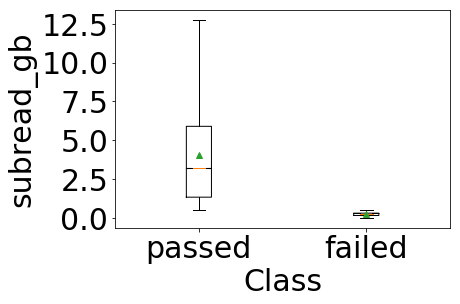

In [26]:
#plot the subread_gb by pass,fail!
import pandas as pd
import matplotlib.pylab as plt
p = "/global/projectb/scratch/beecroft/datahack-dw/"
c='subread_gb'
passed=result4_p[c]
failed=result4_f[c]

plt.figure()#figsize=(30,30))
plt.rcParams['font.size'] = 30
plt.boxplot([passed, failed], '.', labels=['passed', 'failed'], showmeans=True, showfliers=False)
plt.locator_params(nbins=6)
plt.xlabel('Class')
plt.ylabel('subread_gb')
plt.show()


In [27]:
corrf = result4_f.corr(method ='spearman')
corrp = result4_p.corr(method ='spearman')

c1 = corrf.abs().stack()
s = c1.sort_values(ascending = False)
s = s[s != 1]
s[:20]

COLLECTION_ALTIT_DEPTH_METERS  COLLECTION_LOCATION_ID           1.000000
COLLECTION_LOCATION_ID         COLLECTION_ALTIT_DEPTH_METERS    1.000000
                               LAST_UPDATED_BY                  0.999976
                               LAST_UPDATED_BY_ID               0.999976
LAST_UPDATED_BY_ID             COLLECTION_LOCATION_ID           0.999976
LAST_UPDATED_BY                COLLECTION_LOCATION_ID           0.999976
QC_TOTAL_MASS_NG               CURRENT_STATUS_ID                0.999095
CURRENT_STATUS_ID              QC_TOTAL_MASS_NG                 0.999095
CURRENT_CONCENTRATION_NGUL     CURRENT_QC_TYPE_ID               0.996383
CREATED_BY                     QC_TOTAL_MASS_NG                 0.996383
QC_TOTAL_MASS_NG               CURRENT_QC_TYPE_ID               0.996383
                               CUMULATIVE_QC_TYPE_ID            0.996383
                               CREATED_BY_ID                    0.996383
                               CREATED_BY          

### Get the categorical columns in the clarity and process info tables from DW
### Run a chi-square test for all categorical fields to find what differs between failed and passed cases

In [28]:

cols = result3c_f.columns
num_cols = result3c_f._get_numeric_data().columns
categ_columns = list(set(cols) - set(num_cols))


import numpy as np

#https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.chisquare.html
#Categorical attributes?
from scipy.stats import chisquare
#result3c_f.groupby('SOW_PLATFORM').count()['ACCT_ID']
for c in categ_columns:
    # Try with c='SOW_PLATFORM'
    freqs_f=result3c_f[c].value_counts()
    freqs_p=result3c_p[c].value_counts()
    #contingency table
    obs = np.array([ freqs_f,freqs_p] )#.T
    #chi2 = chisquare(obs) #[16, 18, 16, 14, 12, 12])
    #print("%s chi2 %s"  % (c , chi2))
    print(obs)
    stat, p, dof, expected = chi2_contingency(obs)
    print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0) %s ' % (c))
        # interpret p-value
        alpha = 1.0 - prob
        print('significance=%.3f, p=%.3f' % (alpha, p))
    else:
        print('Independent (fail to reject H0) %s ' % (c))


[ near Alda, NE                                                                                                       219
Kearney Agricultural Station. Drought stress                                                                        129
UGA plant biology greenhouse                                                                                        104
Harvard Forest, Petersham, MA / Anaerobic enrichment on organosolv lignin liquid culture                            101
Greenhouse                                                                                                           51
DSMZ medium no. 92, 28?C, aerobe                                                                                     50
CA, Marysville Road                                                                                                  18
Malt extract broth                                                                                                   16
minimal media                         

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Run a chi-square test for all categorical fields in the sample info to find what differs between failed and passed cases

In [29]:
cols = result4_f.columns
num_cols = result4_f._get_numeric_data().columns
categ_columns = ['CREATED_BY'] #list(set(cols) - set(num_cols))

#https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np

#https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.chisquare.html
#Categorical attributes?
from scipy.stats import chisquare
#result3c_f.groupby('SOW_PLATFORM').count()['ACCT_ID']
for c in categ_columns:
    # Try with c='SOW_PLATFORM'
    freqs_f=result4_f[c].value_counts()
    freqs_p=result4_p[c].value_counts()
    #contingency table
    obs = np.array([ freqs_f,freqs_p] )#.T
    #chi2 = chisquare(obs) #[16, 18, 16, 14, 12, 12])
    #print("%s chi2 %s"  % (c , chi2))
    print(obs)
    stat, p, dof, expected = chi2_contingency(obs)
    print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0) %s ' % (c))
        # interpret p-value
        alpha = 1.0 - prob
        print('significance=%.3f, p=%.3f' % (alpha, p))
    else:
        print('Independent (fail to reject H0) %s ' % (c))



[[ 92386  33822  26031  12475  11847   4344   4331   3562   1209   1092
     988    611    559    481    481    416    351    234    143    143
      52     26     26     26     26     26     13     13     13     13]
 [945569 345374 266184 127665 121307  44310  43175  36442  12369  11172
   10108   6251   5719   4921   4921   4256   3591   2394   1463   1463
     532    266    266    266    266    266    133    133    133    133]]
dof=29
probability=0.950, critical=42.557, stat=2.717
Independent (fail to reject H0) CREATED_BY 


In [30]:
###obs.shape
###freqs_f.shape

### rRNA failures and passes with:
##### mysql -h nerscdb04.nersc.gov -u rqc_read -p -e "select rps.stats_value from seq_unit_qc sq inner join seq_units su on sq.seq_unit_name = su.seq_unit_name inner join rqc_pipeline_queue rpq on rpq.seq_unit_id = su.seq_unit_id inner join rqc_pipeline_stats rps on rps.rqc_pipeline_queue_id = rpq.rqc_pipeline_queue_id where rps.stats_name = \"illumina read percent contamination rrna\" and sq.qc_state = 0" rqc > passed_rrna.txt
##### mysql -h nerscdb04.nersc.gov -u rqc_read -p -e "select rps.stats_value from seq_unit_qc sq inner join seq_units su on sq.seq_unit_name = su.seq_unit_name inner join rqc_pipeline_queue rpq on rpq.seq_unit_id = su.seq_unit_id inner join rqc_pipeline_stats rps on rps.rqc_pipeline_queue_id = rpq.rqc_pipeline_queue_id where rps.stats_name = \"illumina read percent contamination rrna\" and sq.qc_state = 1" rqc > failed_rrna.txt

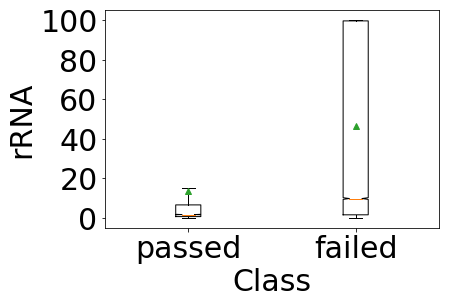

In [31]:
##Do rRNA analysis
#TODO boxplot and histogram: compare rRNA content for failed vs. passed classes
import pandas as pd
import matplotlib.pylab as plt
p = "/global/projectb/scratch/beecroft/datahack-dw/"
rrna_pass=pd.read_csv(p+"RQC-964.passed_rrna.txt")
rrna_fail=pd.read_csv(p+"RQC-964.failed_rrna.txt")

plt.figure()#figsize=(30,30))
plt.rcParams['font.size'] = 30
plt.boxplot([rrna_pass['stats_value'], rrna_fail['stats_value']], '.', labels=['passed', 'failed'], showmeans=True, showfliers=False)
plt.locator_params(nbins=6)
plt.xlabel('Class')
plt.ylabel('rRNA')
plt.show()


# Make a hist

In [ ]:
import numpy as np
bins = np.linspace(0, 100, 100)
plt.hist(rrna_pass, bins, alpha=0.5, label='rrna_pass')
plt.hist(rrna_fail, bins, alpha=0.5, label='rrna_fail')
plt.legend(loc='upper right')
plt.show()